## Data Dictionary (Metadata)
1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female

3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

4. Partner: Indicate if the customer has a partner: Yes, No

5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

6. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

7. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

8. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

9. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

10. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

11. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

12. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

13. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

17. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

18. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

19. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

20. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

21. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

21. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

In [1]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# load dataset ke raw_data
raw_data = pd.read_csv('Telco-Customer-Churn.csv')
raw_data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
raw_data['Churn'].value_counts(normalize=True) #im-balance data

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [5]:
#gunakan code ini sebelum EDA
raw_data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
raw_data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [6]:
#mengubah tipe data pada kolom TotalCharges
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors = 'coerce')

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


### <b> Categorical Data <b>

In [8]:
def proportional_aggregation(df, y, x):
    temp_df = df.groupby([y,x], as_index = False).size()
    temp_df['proportional'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
    return temp_df

In [9]:
categorical_table = ["gender", "OnlineBackup", "DeviceProtection", "StreamingTV", "StreamingMovies", "Contract",
                     "TechSupport", "PaperlessBilling", "PaymentMethod", "PhoneService", "InternetService"]

In [10]:
for table in categorical_table:
  print(f"Below is table {table}")
  print(proportional_aggregation(raw_data, table, "Churn"))
  print("--------------------------------------------")
  print(" ")

Below is table gender
   gender  Churn  size  proportional
0  Female      0  2549      0.730791
1  Female      1   939      0.269209
2    Male      0  2625      0.738397
3    Male      1   930      0.261603
--------------------------------------------
 
Below is table OnlineBackup
   OnlineBackup  Churn  size  proportional
0             0      0  3268      0.708279
1             0      1  1346      0.291721
2             1      0  1906      0.784685
3             1      1   523      0.215315
--------------------------------------------
 
Below is table DeviceProtection
   DeviceProtection  Churn  size  proportional
0                 0      0  3297      0.713482
1                 0      1  1324      0.286518
2                 1      0  1877      0.774979
3                 1      1   545      0.225021
--------------------------------------------
 
Below is table StreamingTV
   StreamingTV  Churn  size  proportional
0            0      0  3281      0.756688
1            0      1  1055    

In [11]:
def barplot_churn(obj_col):
  g = sns.FacetGrid(
      data = proportional_aggregation(raw_data, obj_col, "Churn"), #pilih kolom yang ingin dihitung dan disimpan didalam variabel data
      col = obj_col, #Pilih kolom yang ingin dianalisa
      aspect = 2)
      #Nilai 2 mengindikasikan bahwa subplot akan memiliki lebar yang dua kali lebih besar dari tingginya.
  g.map(sns.barplot, "Churn", "proportional",order = [0,1])

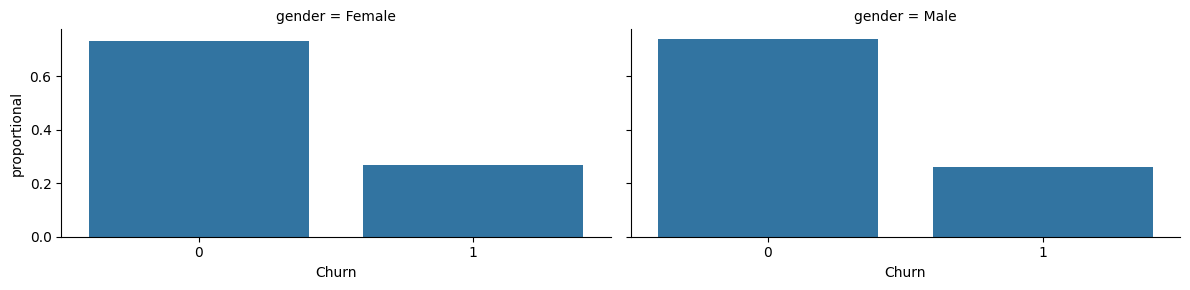

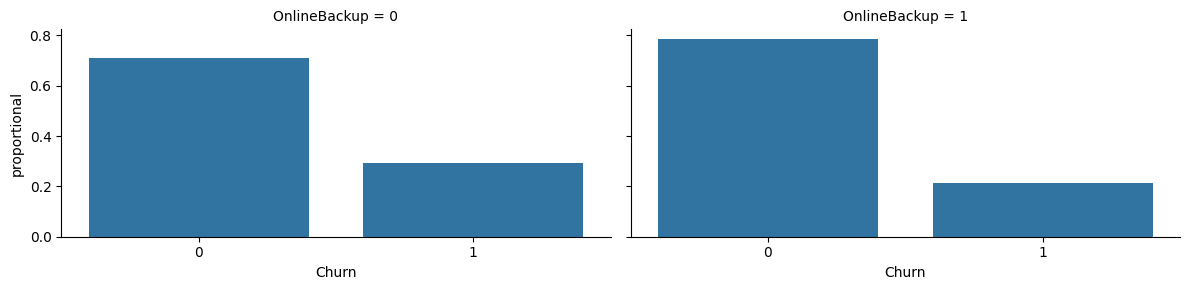

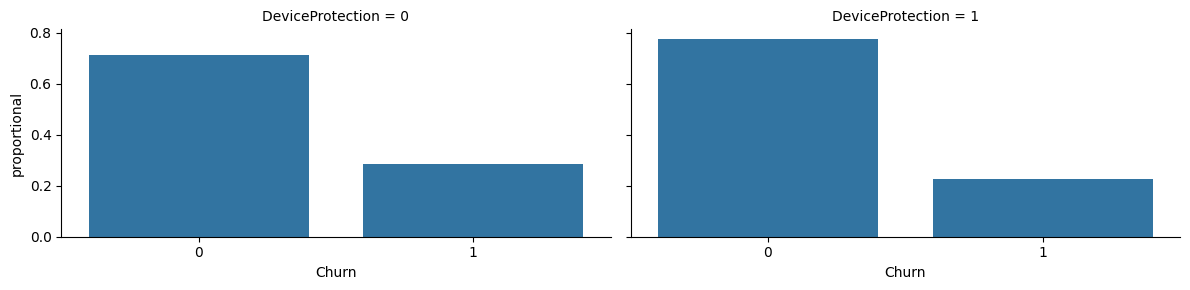

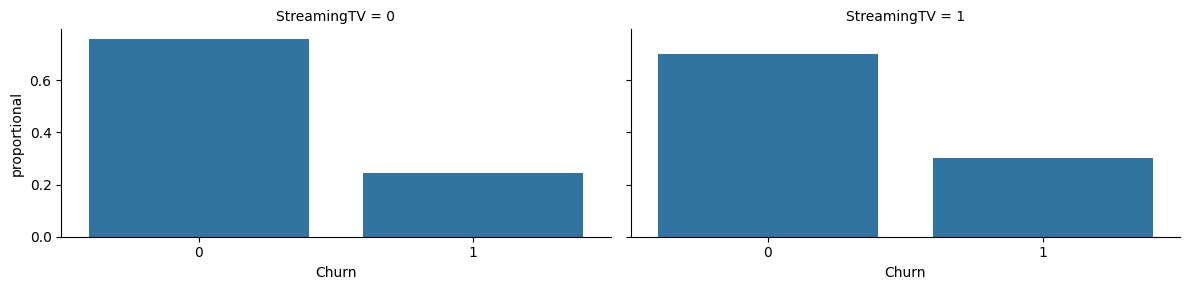

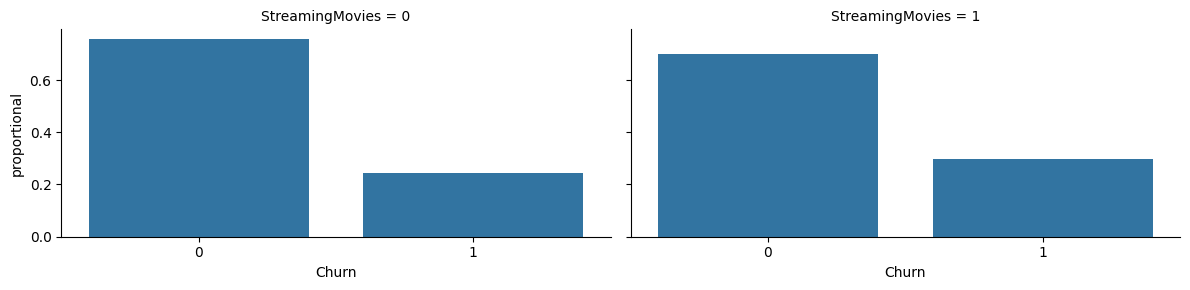

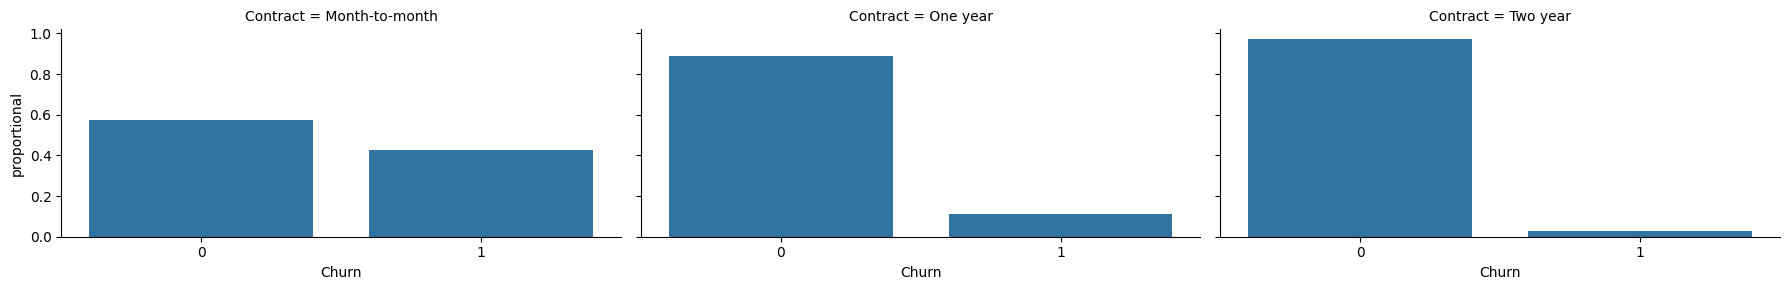

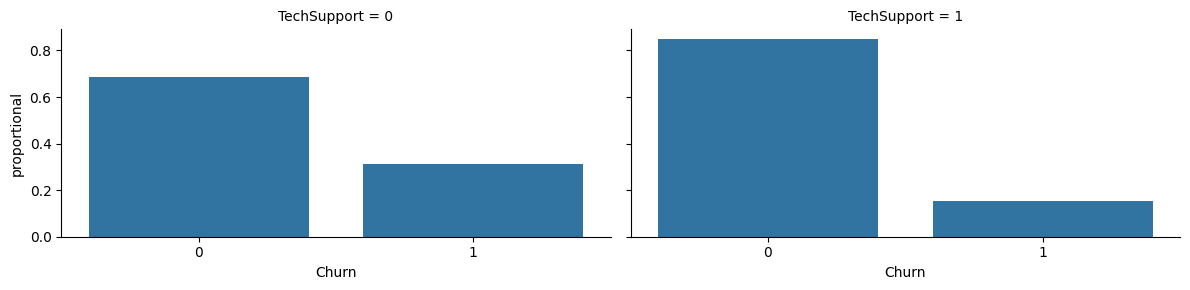

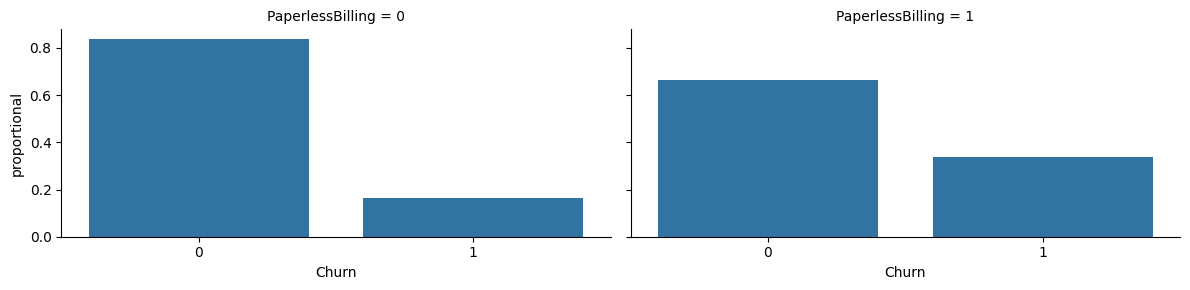

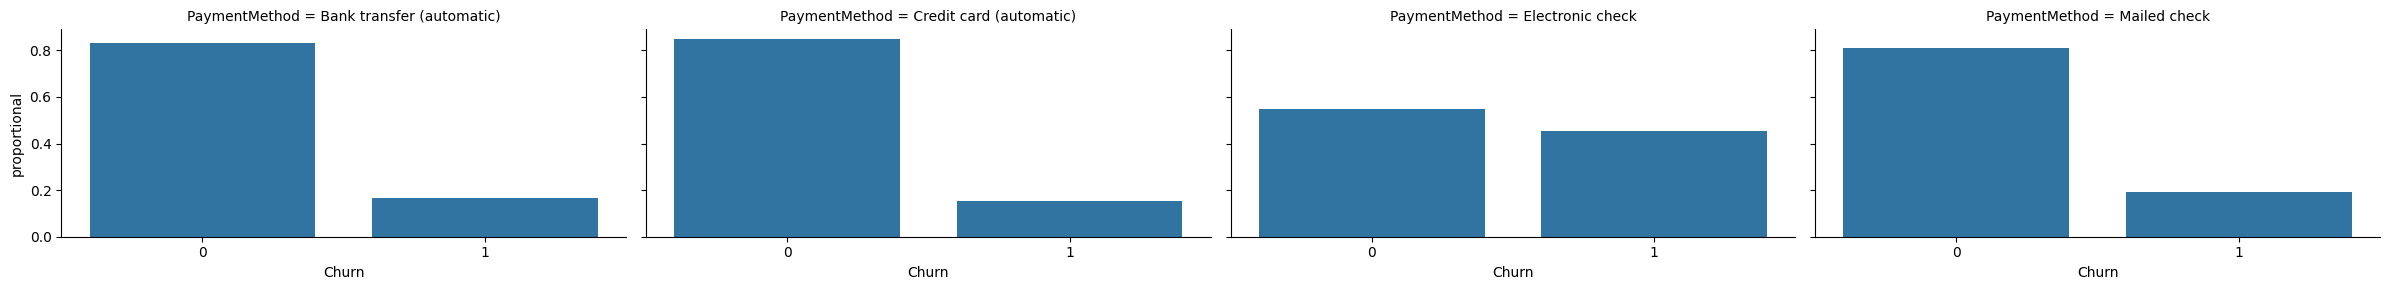

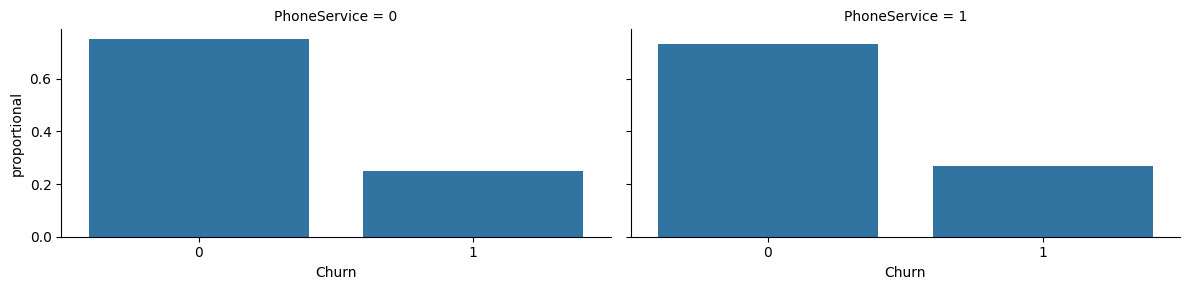

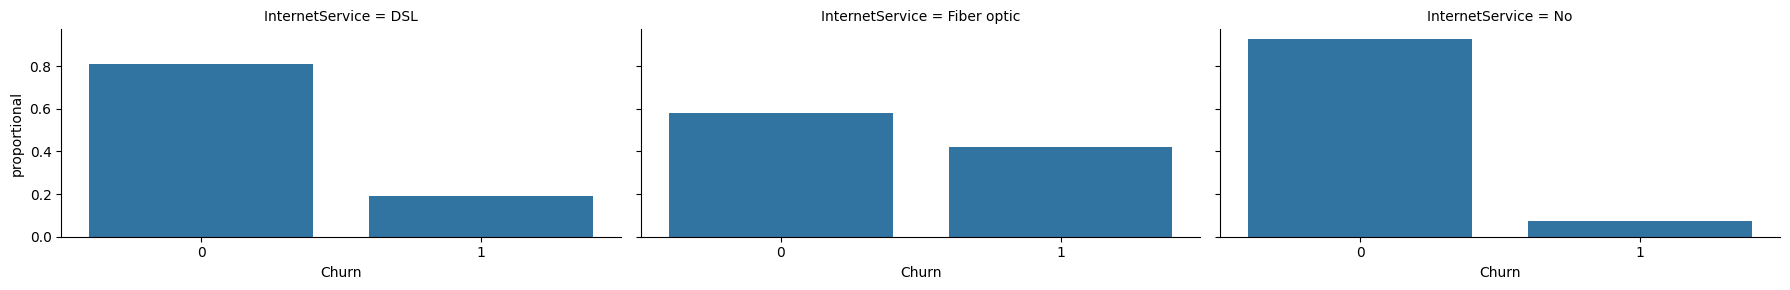

In [12]:
for table in categorical_table:
  barplot_churn(table)

1. Gender:

  The majority of customers are male, comprising 73.8% of non-churners and 26.2% of churners.
  Females account for 73.1% of non-churners and 26.9% of churners.

2. OnlineBackup:

  Customers without online backup have a higher churn rate (29.17%) compared to those with online backup (21.53%).
  The majority (78.47%) of non-churners have online backup, indicating its potential impact on customer retention.

3. DeviceProtection:

  Similar to online backup, customers without device protection experience a higher churn rate (28.65%) compared to those with device protection (22.50%).
  The majority (77.50%) of non-churners have device protection.

4. StreamingTV:

  Customers without streaming TV have a higher churn rate (24.33%) compared to those with streaming TV (20.37%).
  The majority (75.67%) of non-churners have streaming TV.

5. StreamingMovies:

  Similar to streaming TV, customers without streaming movies have a higher churn rate (24.38%) compared to those with streaming movies (23.94%).
  The majority (75.62%) of non-churners have streaming movies.

6. Contract:

  Customers with month-to-month contracts have a higher churn rate (42.71%) compared to one-year (11.27%) and two-year (2.83%) contracts.
  The majority of non-churners have two-year contracts (97.17%).

7. TechSupport:

  Customers without tech support experience a higher churn rate (31.19%) compared to those with tech support (15.17%).
  The majority (84.83%) of non-churners have tech support.

8. PaperlessBilling:

  Customers with paperless billing have a higher churn rate (33.57%) compared to those without paperless billing (16.33%).
  The majority (83.67%) of non-churners have paperless billing.

9. PaymentMethod:

  Customers using electronic check as a payment method have a higher churn rate (45.29%) compared to other methods.
  Bank transfer and credit card (automatic) show lower churn rates.

10. PhoneService:

  Both customers with and without phone service show relatively balanced churn rates.
  The majority (73.29%) of non-churners have phone service.

11. InternetService:

  Customers with fiber optic internet service have a higher churn rate (41.89%) compared to DSL (18.96%) and no internet service (7.41%).
  The majority of non-churners (92.60%) have no internet service

### <b> Numerical Data <b>

In [13]:
numerical_table = ["MonthlyCharges", "tenure"]

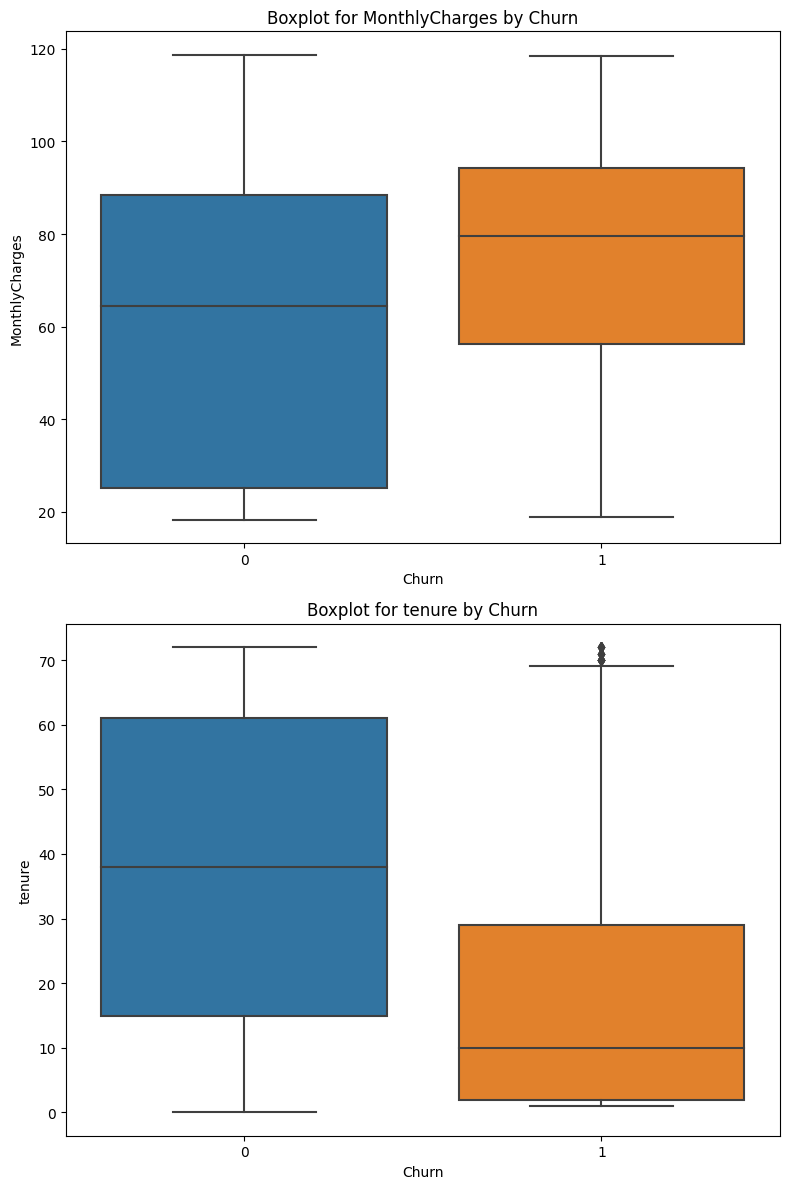

In [14]:
# Set up subplots
fig, axes = plt.subplots(len(numerical_table), 1, figsize=(8, len(numerical_table) * 6))

# Loop through each numerical feature
for i, table in enumerate(numerical_table):
    # Create a boxplot on the current subplot
    sns.boxplot(x="Churn", y=table, data=raw_data, ax=axes[i])

    # Set subplot title
    axes[i].set_title(f'Boxplot for {table} by Churn')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the observed boxplots:

1. Elevated monthly charges are associated with a higher churn rate, whereas lower monthly charges are linked to a lower likelihood of churn.
2. In contrast to the impact of monthly charges, customers with extended tenure tend to exhibit a lower churn rate, while those with shorter tenure are more prone to churn.

## <b> Feature Engineering <b>

In [15]:
raw_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [16]:
raw_data.drop(columns = ['customerID'], inplace = True)

In [17]:
#Train test Split (train : tes = 80:20)
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_data, test_size = 0.2, random_state=42)

### <b> Missing Value <b>

In [18]:
train.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [19]:
test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

In [20]:
raw_data[raw_data['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,Male,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0
936,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN,0
1082,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0
1340,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,NaN,0
3826,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0
4380,Female,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0
5218,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,NaN,0
6670,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN,0


In [21]:
100 * len(raw_data[raw_data['TotalCharges'].isna()]) / len(raw_data)

0.15618344455487718

In [22]:
# Median imputation on TotalCharges column : train
median_totalcharges = train[~train['TotalCharges'].isna()]['TotalCharges'].median()
median_totalcharges

1410.8

In [23]:
#implement missing value imputation to train and test, from TotalCharges median value in train data
train['TotalCharges'].fillna(median_totalcharges, inplace=True)
test['TotalCharges'].fillna(median_totalcharges, inplace=True)

In [24]:
train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <b> Encoding <b>

#### <b> One Hot Encoding (OHE) <b>

In [26]:
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
train = pd.get_dummies(train, columns=encode_ohe)
test = pd.get_dummies(test, columns=encode_ohe)

#### <b> Mean Encoding <b>

In [27]:
dict_Internet = train.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_Contract = train.groupby(['Contract'])['Churn'].mean().to_dict()
dict_PaymentMethod = train.groupby(['PaymentMethod'])['Churn'].mean().to_dict()

In [28]:
train['InternetService'] = train['InternetService'].map(dict_Internet)
train['Contract'] = train['Contract'].map(dict_Contract)
train['PaymentMethod'] = train['PaymentMethod'].map(dict_PaymentMethod)
test['InternetService'] = test['InternetService'].map(dict_Internet)
test['Contract'] = test['Contract'].map(dict_Contract)
test['PaymentMethod'] = test['PaymentMethod'].map(dict_PaymentMethod)

## <b> Feature Scalling <b>

### <b> Standard Scaller Method <b>

In [29]:
# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [30]:
# Menerapkan standarisasi ke data pelatihan (train)
train[['tenure_stds', 'MonthlyCharges_stds', 'TotalCharges_stds']] = scaler.fit_transform(train[columns_to_stdscaller])

# Menerapkan standarisasi yang sama ke data uji (test)
test[['tenure_stds', 'MonthlyCharges_stds', 'TotalCharges_stds']] = scaler.transform(test[columns_to_stdscaller])

In [31]:
train[['tenure_stds', 'MonthlyCharges_stds', 'TotalCharges_stds']].describe()

,tenure_stds,MonthlyCharges_stds,TotalCharges_stds
count,5.634000e+03,5.634000e+03,5.634000e+03
mean,8.355246e-17,-6.129282e-16,1.765637e-17
std,1.000089e+00,1.000089e+00,1.000089e+00
min,-1.325551e+00,-1.549333e+00,-1.004222e+00
25%,-9.570361e-01,-9.676800e-01,-8.302416e-01
50%,-1.381148e-01,1.881481e-01,-3.886320e-01
75%,9.264829e-01,8.333678e-01,6.708785e-01
max,1.622566e+00,1.786033e+00,2.828180e+00


### <b> Plotting kdeplot <b>

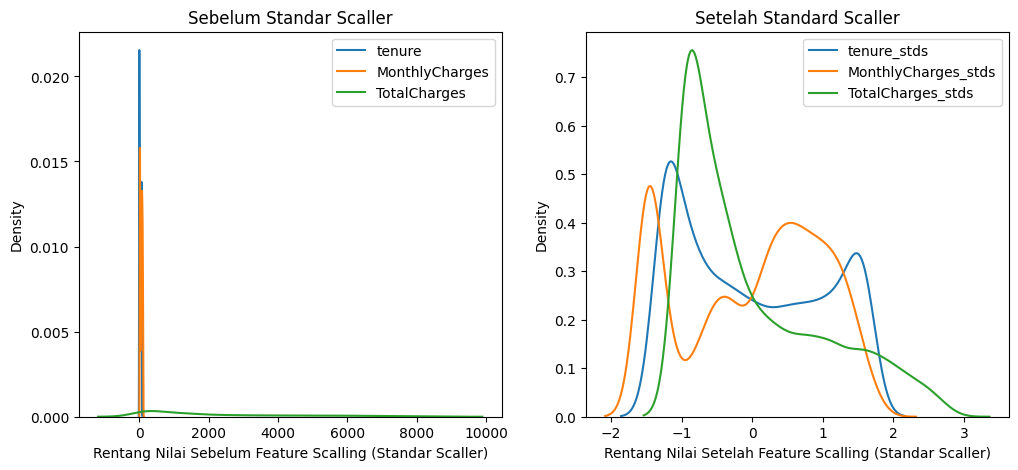

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(train['tenure'], ax=ax1, label='tenure')
sns.kdeplot(train['MonthlyCharges'], ax=ax1, label='MonthlyCharges')
sns.kdeplot(train['TotalCharges'], ax=ax1, label='TotalCharges')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(train['tenure_stds'], ax=ax2, label='tenure_stds')
sns.kdeplot(train['MonthlyCharges_stds'], ax=ax2, label='MonthlyCharges_stds')
sns.kdeplot(train['TotalCharges_stds'], ax=ax2, label='TotalCharges_stds')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

## <b> Machine Learning Modelling <b>

In [33]:
#split dataset to X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Churn'])
y_train = train['Churn']
X_test = test.drop(columns=['Churn'])
y_test = test['Churn']

In [34]:
y_train.value_counts(normalize=True)

0    0.734469
1    0.265531
Name: Churn, dtype: float64

### <b> Logistic Regression <b>

In [56]:
logistic_model = LogisticRegression(
    random_state = 42,
    max_iter=1000,
    class_weight = {0: 0.265531, 1:0.734469} #class_weight = pembobotan (dibalik agar stabil antara 0 dan 1)
)

In [57]:
# Model Fitting
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.265531, 1: 0.734469}, max_iter=1000,
                   random_state=42)

### <b> KNN <b>

In [58]:
# there is not a class weight in KNN
knn_clf = KNeighborsClassifier()

In [59]:
# Model Fitting
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

### <b> Decision Tree Classifier <b>

In [60]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = {0: 0.265531, 1:0.734469}
)

In [61]:
# Model Fitting
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.265531, 1: 0.734469}, random_state=42)

### <b> Support Vector Machines <b>

In [62]:
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = {0: 0.265531, 1:0.734469}
)

In [63]:
# Model Fitting
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.265531, 1: 0.734469}, probability=True, random_state=42)

## <b> Model Evaluation <b>

* TP : Prediksi Positif (yes churn) dan data y_test nya true (Yes churn) (sesuai prediksi)
* TN : Prediksi Negatif (No churn) dan data y_test (actual) nya true (No churn) (sesuai prediksi)
* FP : Prediksi Positif (yes churn) tapi data y_test false (negatif) (No churn) (Tidak sesuai prediksi)
* FN : Prediksi Negatif (No churn) tapi data y_test false (positif) (Yes churn (Tidak sesuai prediksi)

Notes :

1. Fokus pada recall (berkaitan dengan FN , karena **FN itu berbanding terbalik dengan recall**)
2. Presisi (berkaitan dengan FP karena **FP itu berbanding terbalik dengan presisi**).
3. Supaya Recall tinggi maka FN harus kecil,
4. Supaya Presisi tinggi maka FP harus kecil.

In [64]:
def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    print('ROC-AUC Score Train:', roc_auc_score(y_train, y_pred_train))

    y_pred_test = model.predict(x_test)
    print('')
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred_test))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))
    print('ROC-AUC Score Test:', roc_auc_score(y_test, y_pred_test))

In [65]:
#logistic regression
logreg_pred = logistic_model.predict(X_test)

# knn prediction
knn_pred = knn_clf.predict(X_test.values)

# decision tree prediction
dc_pred = dt_clf.predict(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### <b> Logistic Regression <b>

In [66]:
evaluate(logistic_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      4138
           1       0.52      0.79      0.63      1496

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1177
True Negative: 3059
False Positive: 1079
False Negative: 319

Accuracy Data Train: 0.751863684771033
Precision Data Train: 0.5217198581560284
Recall Data Train: 0.7867647058823529
F1-Score Data Train: 0.6273987206823028
ROC-AUC Score Train: 0.763005359224405

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1036
           1       0.55      0.83      0.66       373

    accuracy                           0.77      1409
   m

### <b> KNN <b>

In [67]:
evaluate(knn_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4138
           1       0.73      0.56      0.63      1496

    accuracy                           0.83      5634
   macro avg       0.79      0.74      0.76      5634
weighted avg       0.82      0.83      0.82      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 833
True Negative: 3834
False Positive: 304
False Negative: 663

Accuracy Data Train: 0.8283635072772453
Precision Data Train: 0.7326297273526825
Recall Data Train: 0.5568181818181818
F1-Score Data Train: 0.6327383213064944
ROC-AUC Score Train: 0.7416763697877762

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.89      0.85      1036
           1       0.60      0.48      0.54       373

    accuracy                           0.78      1409
   m

### <b> Decision Tree Classifier

In [68]:
evaluate(dt_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       0.99      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1496
True Negative: 4129
False Positive: 9
False Negative: 0

Accuracy Data Train: 0.9984025559105432
Precision Data Train: 0.9940199335548173
Recall Data Train: 1.0
F1-Score Data Train: 0.9970009996667778
ROC-AUC Score Train: 0.998912518124698

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65

### <b> Support Vector Machines <b>

In [69]:
evaluate(svm_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      4138
           1       0.40      0.54      0.46      1496

    accuracy                           0.66      5634
   macro avg       0.60      0.62      0.60      5634
weighted avg       0.70      0.66      0.67      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 814
True Negative: 2896
False Positive: 1242
False Negative: 682

Accuracy Data Train: 0.6585019524316649
Precision Data Train: 0.3959143968871595
Recall Data Train: 0.5441176470588235
F1-Score Data Train: 0.4583333333333333
ROC-AUC Score Train: 0.6219863247377249

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1036
           1       0.40      0.57      0.47       373

    accuracy                           0.66      1409
   

## <b> Learning Curve <b>

In [70]:
def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

In [71]:
X = pd.concat([X_train, X_test],axis = 0)
y = pd.concat([y_train, y_test],axis = 0)

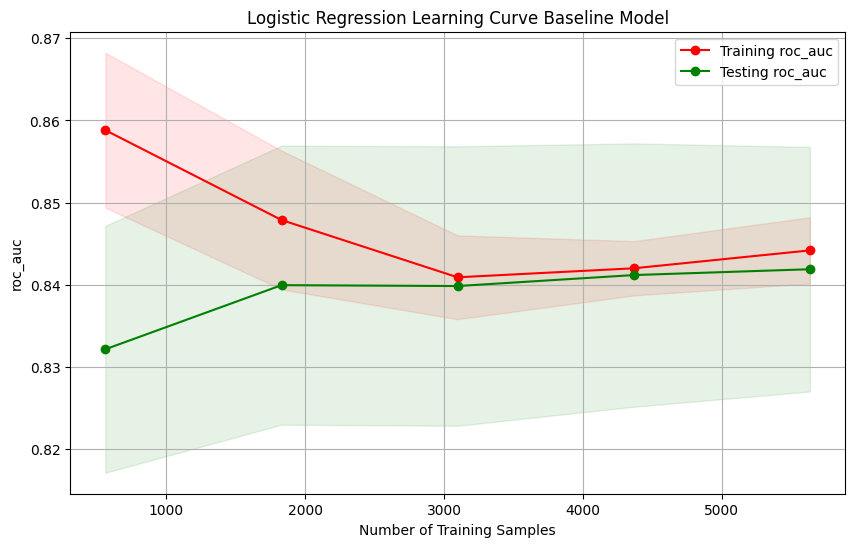

In [80]:
plot_learning_curve_classification(logistic_model, X, y, cv=5, scoring='roc_auc', title="Logistic Regression Learning Curve Baseline Model")

- The model shows good performance on both the training and testing datasets.
- The accuracy is decent, indicating a good overall classification performance.
- Precision, recall, F1-Score, and ROC-AUC scores provide additional insights into the model's ability to correctly classify positive instances and avoid misclassification.
- More samples will make the model optimal

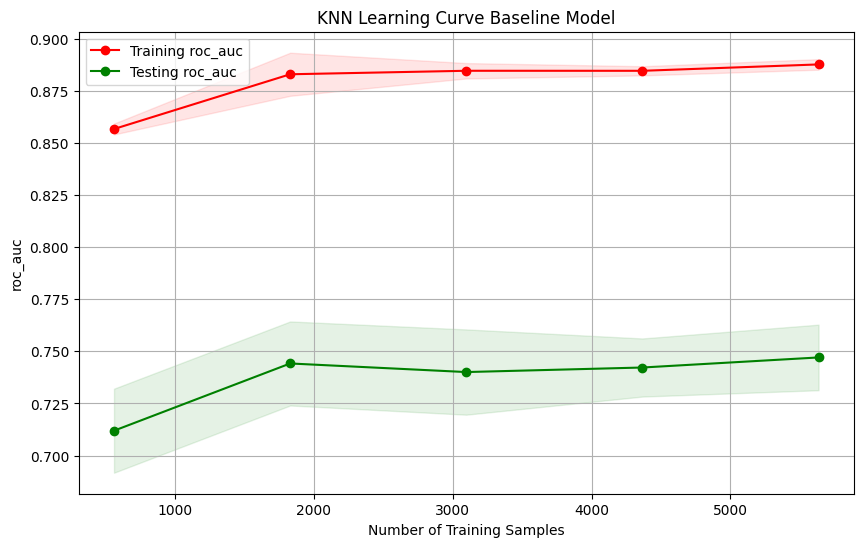

In [75]:
plot_learning_curve_classification(knn_clf, X, y, cv=5, scoring='roc_auc', title="KNN Learning Curve Baseline Model")

- The KNN model shows good performance on the training set, achieving high accuracy.
- Precision, recall, F1-Score, and ROC-AUC scores provide additional insights into the model's ability to correctly classify positive instances and avoid misclassification.
- This condition might be called underfitting because along with the sample increase, the roc_auc for both training and testing shows no improvement (the differences stays the same 0.15)

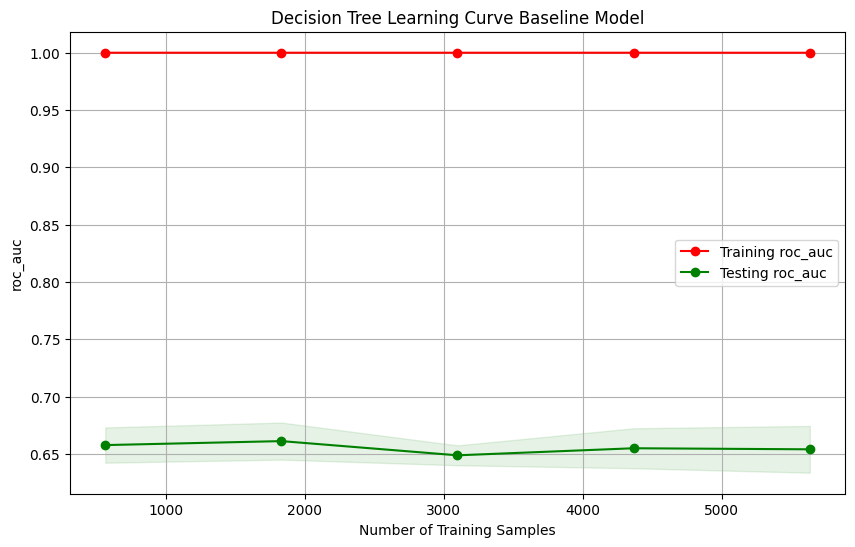

In [76]:
plot_learning_curve_classification(dt_clf, X, y, cv=5, scoring='roc_auc', title="Decision Tree Learning Curve Baseline Model")

- The Decision Tree model shows exceptional performance on the training set, achieving high accuracy and perfect recall.
- On the testing set, the model maintains good accuracy, but there is a trade-off between precision and recall, as evidenced by the F1-Score.
- The ROC-AUC score provides insights into the model's discrimination ability, with a value of 0.6499 on the test set.
- This condition is similar to KNN which more likely underfitting.

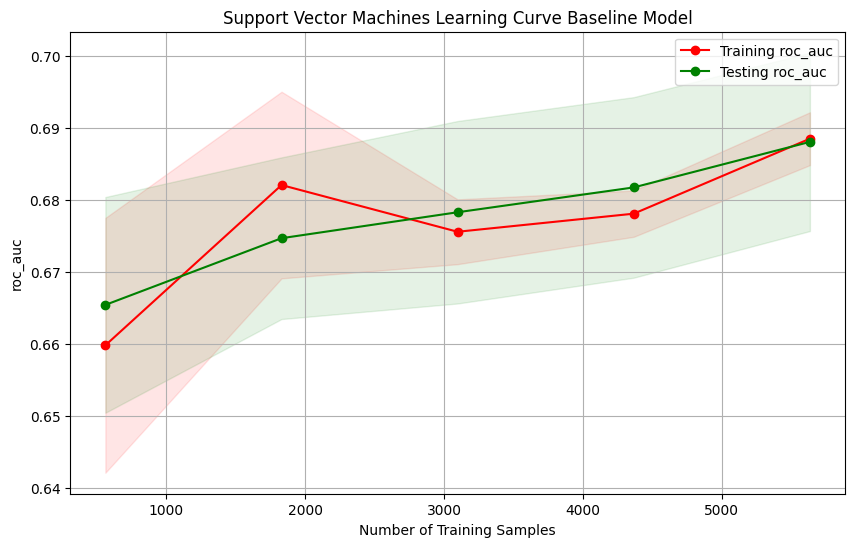

In [81]:
plot_learning_curve_classification(svm_clf, X, y, cv=5, scoring='roc_auc', title="Support Vector Machines Learning Curve Baseline Model")

- The SVM model achieves moderate accuracy on both training and testing sets.
- Precision is relatively low, suggesting that the model may label some negative instances as positive.
- Recall is moderate, indicating the model's ability to capture relevant positive instances.
- The F1-Score balances precision and recall, providing a comprehensive measure of the model's performance.
- The ROC-AUC score indicates fair discrimination ability, with a value of 0.6298 on the test set.
- This model has improvement for roc_auc along with the sample increases and become optimal.

## <b> Model Conclusion <b>

I picked logistic regression because it works well and gets better as we have more data. The model's performance is good, especially when we have larger datasets. It has a crucial score, ROC-AUC, which is higher than 75%, showing that it's good at telling apart different cases. This metric proves the model's ability to distinguish between positive and negative outcomes. I chose logistic regression because it's reliable, efficient, and consistently performs well with different amounts of data. The model maintains a high ROC-AUC score, making it a solid choice for making predictions.

## <b> Cumulative Gain Plot <b>

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

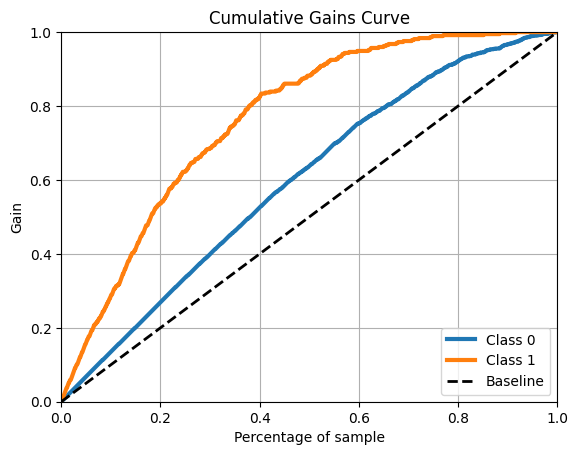

In [82]:
# load scikitplot untuk visualisasi metrik
### logistic_regression -> diambil yang paling best model
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, logistic_model.predict_proba(X_test))

In [83]:
from sklearn.metrics import confusion_matrix
def value_prediction(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [84]:
value_prediction(y_test, logistic_model.predict(X_test))

TN : 778
TP : 311
FN : 62
FP : 258


In [85]:
y_test.value_counts()

0    1036
1     373
Name: Churn, dtype: int64

In [86]:
y_pred = pd.DataFrame(logistic_model.predict(X_test))
y_pred.value_counts()

0    840
1    569
dtype: int64

Populasi kelas 1 dari Pred = 569 orang

% sampling = 40% dari populasi = 227.6 ~ 228 orang

Performa dengan model = 82%

Performa tanpa model (random choice / baseline) = 40%

Biaya promosi / orang = Rp. 300.000

Margin rate = 20%

____

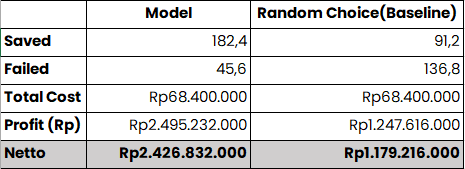
